In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Least Mean Squares (LMS) algorithm
###  Parameters:
>       d   : The vector of desired signal samples.
>       x   : The vector of input signal samples.
>       mu  : The stepsize parameter.
>       M   : The number of taps (filter order).
    
###      Returns:
>       e   : The output error vector.
>       y   : The output coefficients.
>       w   : Filter parameters.
    

In [11]:
def LMS(d, x, mu, M):

    Ns = len(d)

    xx = np.zeros(M)
    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))

    for n in range(Ns):
        xx = np.concatenate((xx[1:], [x[n]]))
        y[n] = np.dot(w1, xx)
        e[n] = d[n] - y[n]
        w1 = w1 + mu * e[n] * xx
        w[:, n] = w1

    return e, y, w


# Normalized Least Mean Squares (NLMS) algorithm
###  Parameters:
>       d  : The vector of desired signal samples.
>       x  : The vector of input signal samples.
>       mu : The stepsize parameter.
>       M  : The number of taps (filter order).
>       a  : The bias parameter.
    
###      Returns:
>       e   : The output error vector.
>       y   : The output coefficients.
>       w   : Filter parameters.

In [12]:
def NLMS(d, x, mu, M, a):

    Ns = len(d)

    xx = np.zeros(M)
    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))

    for n in range(Ns):
        xx = np.concatenate((xx[1:], [x[n]]))
        y[n] = np.dot(w1, xx)
        k = mu / (a + np.dot(xx, xx))
        e[n] = d[n] - y[n]
        w1 = w1 + k * e[n] * xx
        w[:, n] = w1

    return e, y, w

# Recursive Least Squares (RLS) algorithm
###  Parameters:
>       d   : The vector of desired signal samples.
>       x   : The vector of input signal samples.
>       lamda  : The forgetting factor.
>       M   : The number of taps (filter order).

###      Returns:
>       e   : The output error vector.
>       y   : The output coefficients.
>       w   : Filter parameters.

In [13]:
def RLS(d, x, lamda, M):
    Ns = len(d)

    I = np.eye(M)
    a = 0.01
    p = a * I

    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))
    xx = np.zeros(M)

    for n in range(Ns):
        xx = np.concatenate(([x[n]], xx[:-1]))
        k = np.dot(p, xx) / (lamda + np.dot(xx.T, np.dot(p, xx)))
        y[n] = np.dot(xx.T, w1)
        e[n] = d[n] - y[n]
        w1 = w1 + k * e[n]
        p = (p - np.outer(k, np.dot(xx.T, p))) / lamda
        w[:, n] = w1

    return e, y, w


# Filtered-x Least Mean Squares (FxLMS) algorithm
###  Parameters:
>       d : The vector of desired signal samples.
>       x : The vector of input signal samples.
>       mu : The stepsize parameter.
>       M : The number of taps (filter order).
>       h : The coefficients of the feedback filter.
    
###      Returns:
>       e   : The output error vector.
>       y   : The output coefficients.
>       w   : Filter parameters.

In [14]:
def FxLMS(d, x, mu, M, h):
    
    Ns = len(d)

    xx = np.zeros(M)
    w1 = np.zeros(M)
    y = np.zeros(Ns)
    e = np.zeros(Ns)
    w = np.zeros((M, Ns))

    for n in range(Ns):
        xx = np.concatenate((xx[1:], [x[n]]))
        y[n] = np.dot(w1, xx)
        e[n] = d[n] - y[n]
        w1 = w1 + mu * e[n] * xx - mu * np.dot(h, xx) * xx
        w[:, n] = w1

    return e, y, w


### Establish a mathematical model
#### d      : Desired signal
#### noise  : Noise signal
#### x      : Receive signal 
#### fs     : Frequence

1500


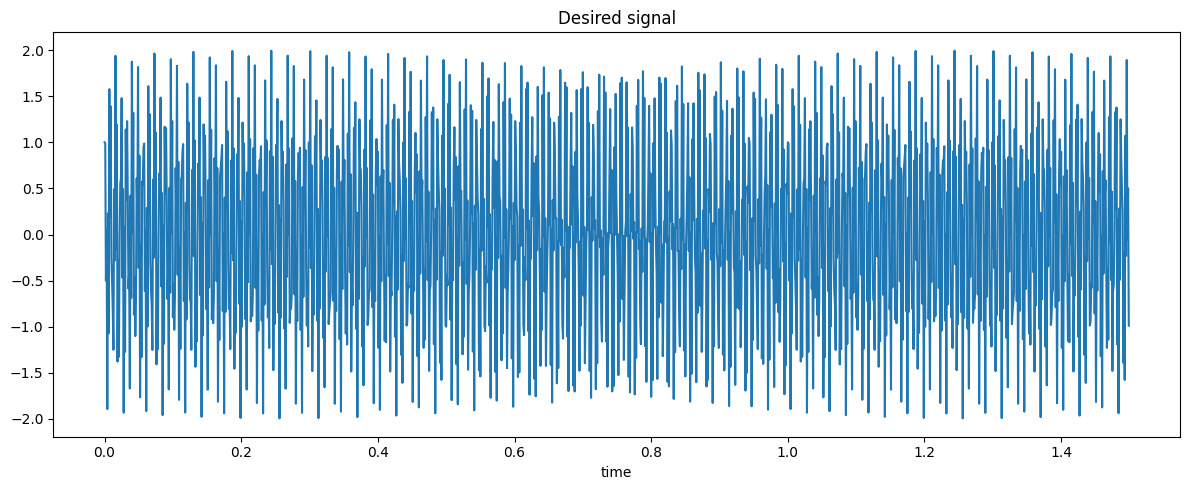

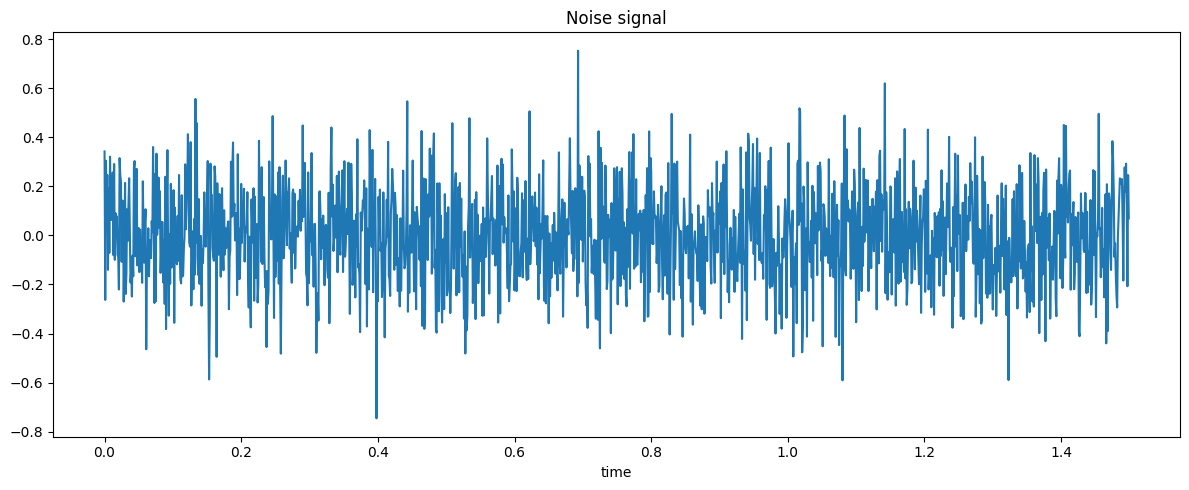

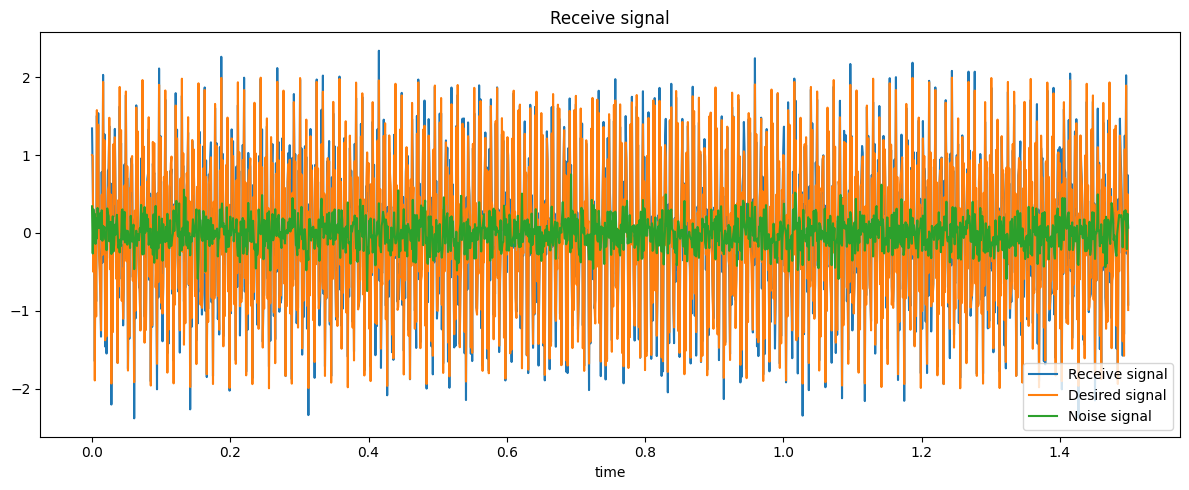

In [15]:
fs = 1000
t = np.arange(0, 1.5, 1/fs)
print(len(t))
noise = np.random.normal(0, np.sqrt(5**(-20/10)), len(t))
d = np.cos(2 * np.pi * 123 * t) + np.sin(2 * np.pi * 456 * t)
x = noise + d

mu = [0.0005, 0.001, 0.005, 0.01]
mu2 = [0.005, 0.01, 0.05, 0.1]
mu3 = [0.001, 0.01, 0.05, 0.08]
a = 0.01
lamda = [1, 0.9999, 0.995, 0.9]
M = 20
h = np.zeros(M)  


plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(d))/fs, d)
plt.xlabel('time')
plt.title('Desired signal')
plt.tight_layout()
plt.show()
    
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(noise))/fs, noise)
plt.xlabel('time')
plt.title('Noise signal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(x))/fs, x, label='Receive signal')
plt.plot(np.arange(len(d))/fs, d, label='Desired signal')
plt.plot(np.arange(len(noise))/fs, noise, label='Noise signal')
plt.xlabel('time')
plt.title('Receive signal')
plt.legend()
plt.tight_layout()
plt.show()


## LMS
#### Using  different stepsizes and compare the LMS performance 

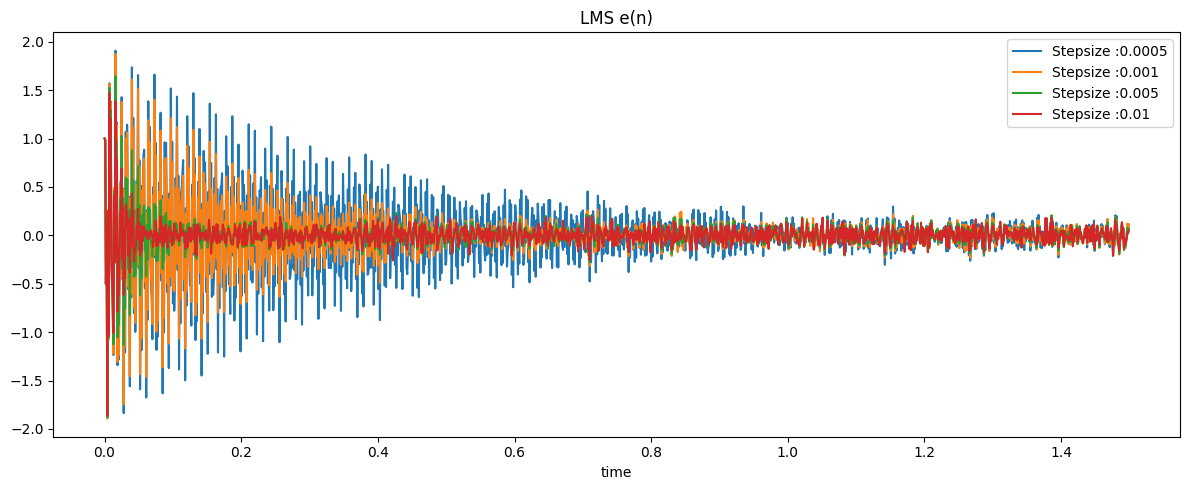

In [16]:
plt.figure(figsize=(12, 5))
for i in mu:
        e1, y1, w1 = LMS(d, x, i, M)
        plt.plot(np.arange(len(e1))/fs, e1, label=f"Stepsize :{i}" )
        plt.xlabel('time')
        plt.title('LMS e(n)')
        plt.tight_layout()
        plt.legend()
plt.show()


## NLMS
#### Using  different stepsizes and compare the NLMS performance 

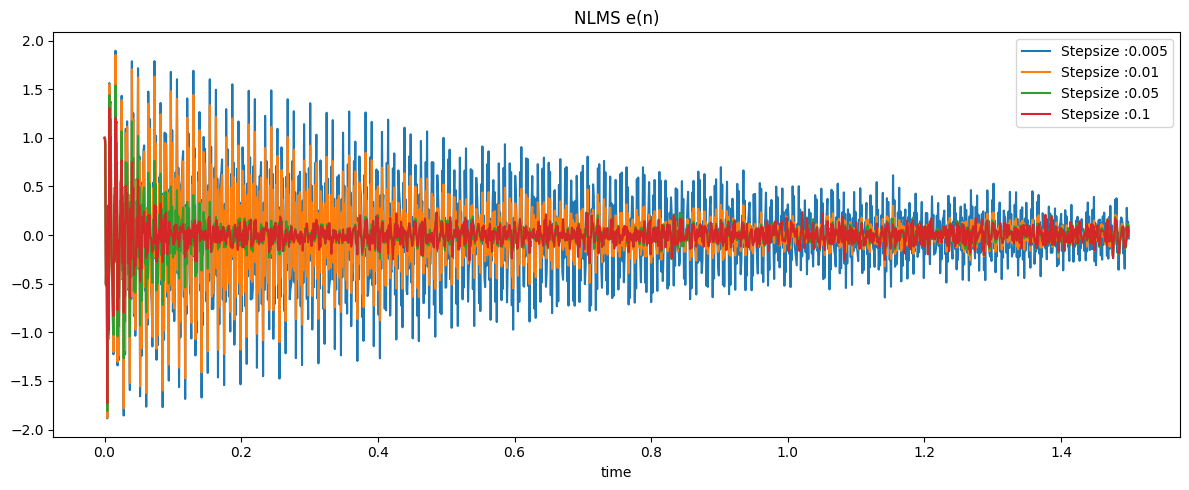

In [17]:
plt.figure(figsize=(12, 5))
for i in mu2:
        e2, y2, w2 = NLMS(d, x, i, M, a)
        plt.plot(np.arange(len(e2))/fs, e2, label=f"Stepsize :{i}" )
        plt.xlabel('time')
        plt.title('NLMS e(n)')
        plt.tight_layout()
        plt.legend()
plt.show()

## RLS
#### Using  different stepsizes and compare performance 

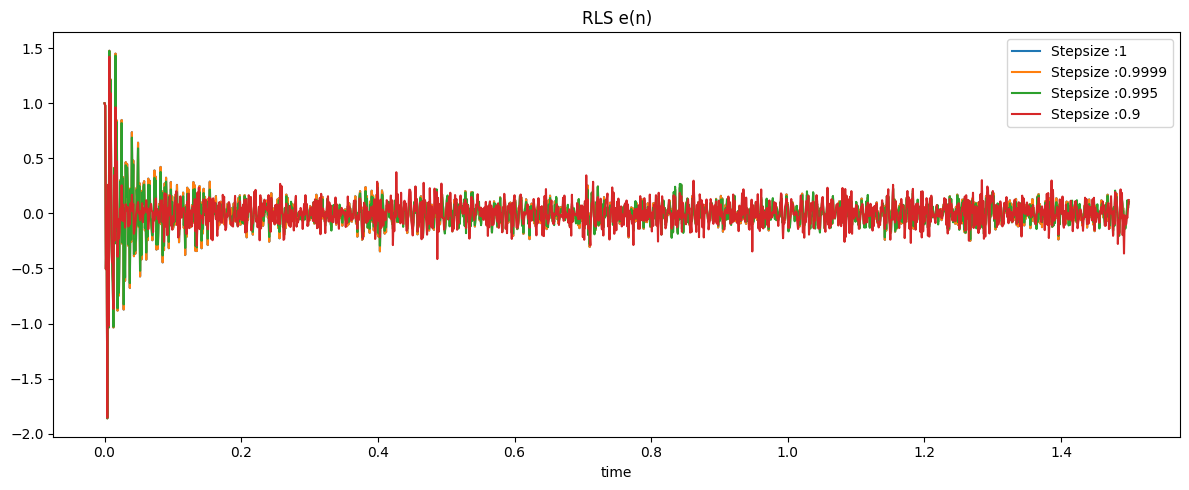

In [18]:
plt.figure(figsize=(12, 5))
for i in lamda:
        e3, y3, w3 = RLS(d, x, i, M)
        plt.plot(np.arange(len(e3))/fs, e3, label=f"Stepsize :{i}" )
        plt.xlabel('time')
        plt.title('RLS e(n)')
        plt.tight_layout()
        plt.legend()
plt.show()     

## FxLMS
#### Using  different stepsizes and compare the performance 

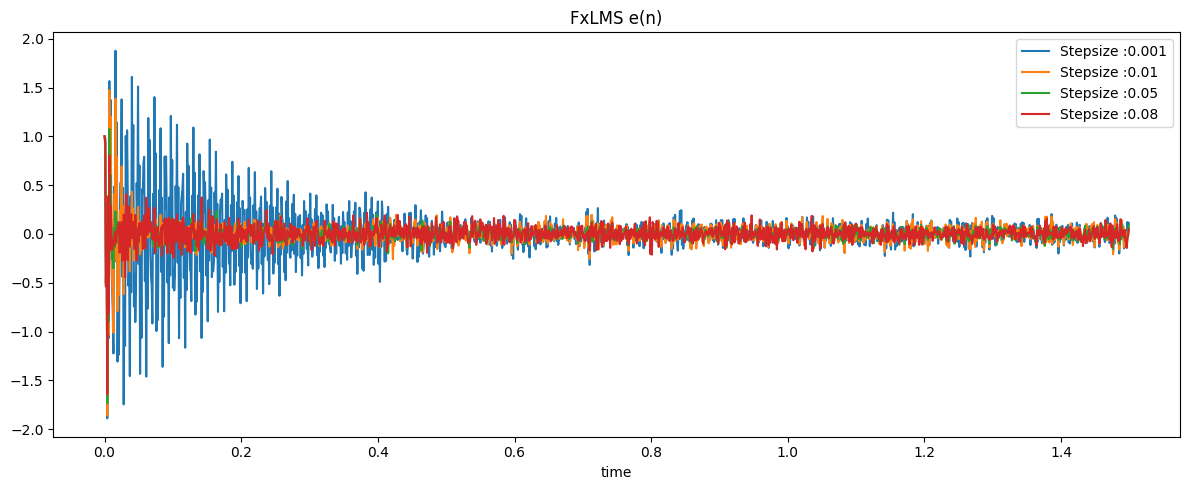

In [19]:
plt.figure(figsize=(12, 5))
for i in mu3:
    e4, y4, w4 = FxLMS(d, x, i, M, h)
    plt.plot(np.arange(len(e4))/fs, e4, label=f"Stepsize :{i}" )
    plt.xlabel('time')
    plt.title('FxLMS e(n)')
    plt.tight_layout()
    plt.legend()
plt.show()

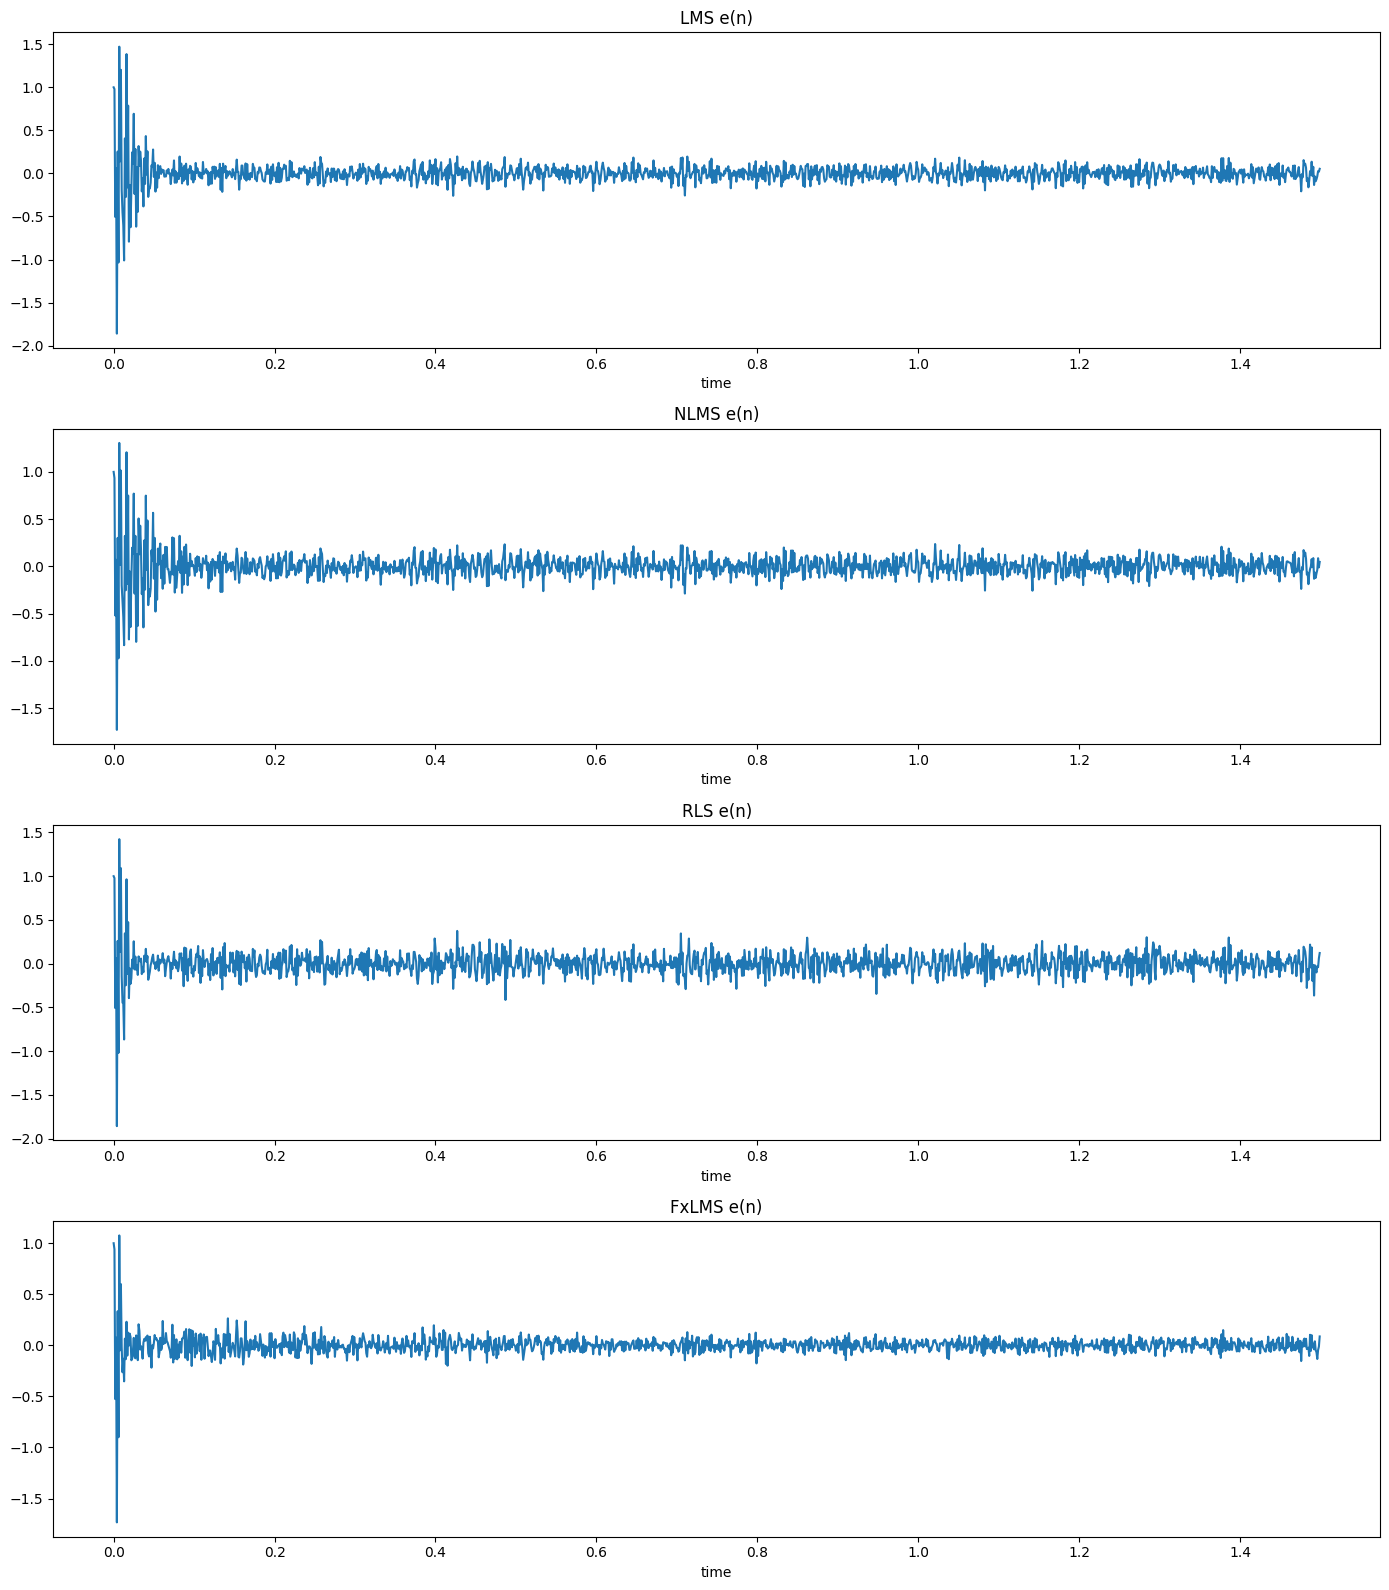

In [20]:
# Plotting the results


# Example of comparison
e1, y1, w1 = LMS(d, x, 0.01, M)
e2, y2, w2 = NLMS(d, x, 0.1, M, a)
e3, y3, w3 = RLS(d, x, 0.9, M)
e4, y4, w4 = FxLMS(d, x, 0.05, M, h)

plt.figure(figsize=(14, 16))

plt.subplot(4, 1, 1)
plt.plot(np.arange(len(e1))/fs, e1)
plt.xlabel('time')
plt.title('LMS e(n)')

plt.subplot(4, 1, 2)
plt.plot(np.arange(len(e2))/fs, e2)
plt.xlabel('time')
plt.title('NLMS e(n)')

plt.subplot(4, 1, 3)
plt.plot(np.arange(len(e3))/fs, e3)
plt.xlabel('time')
plt.title('RLS e(n)')

plt.subplot(4, 1, 4)
plt.plot(np.arange(len(e4))/fs, e4)
plt.xlabel('time')
plt.title('FxLMS e(n)')
plt.tight_layout()
plt.show()



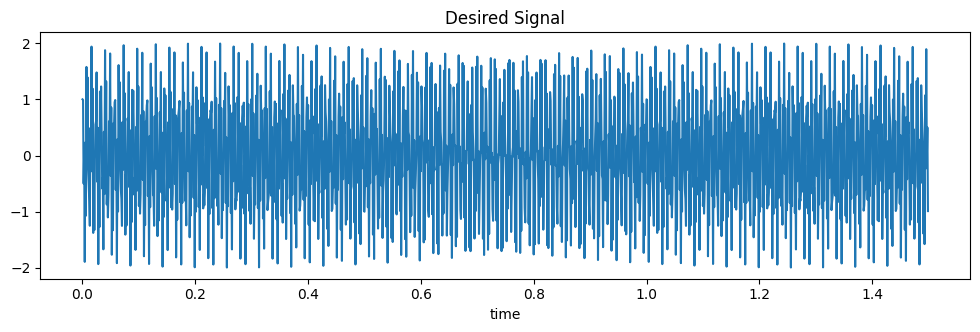

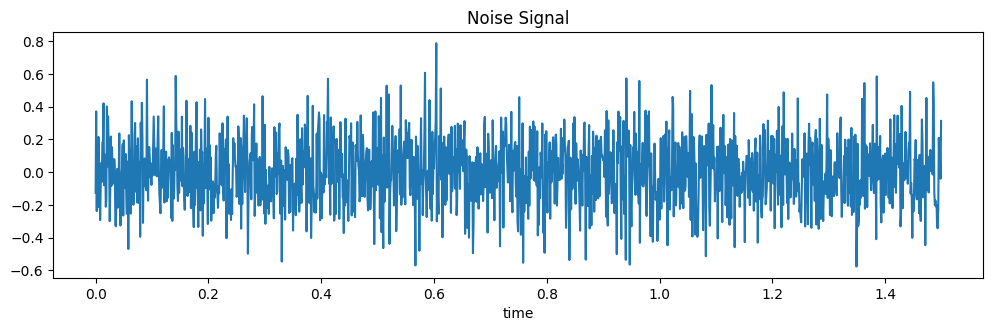

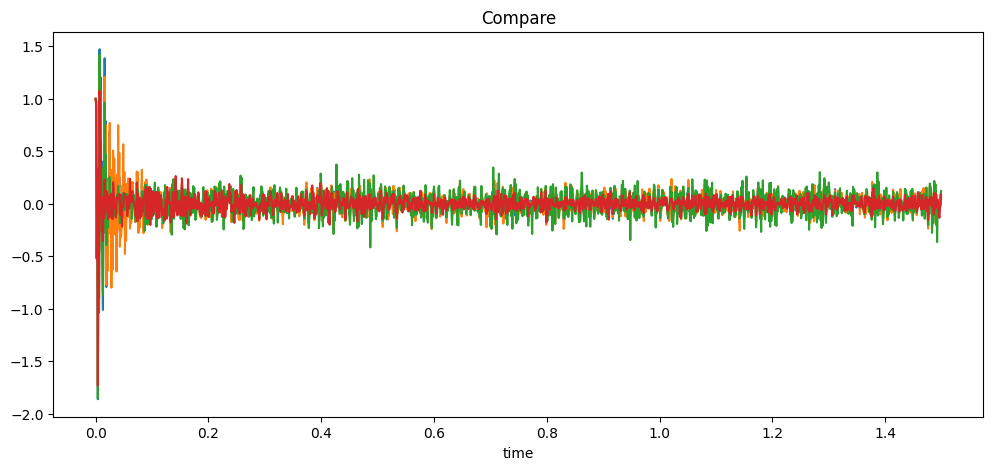

In [26]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# 設置參數
fs = 1000
t = np.arange(0, 1.5, 1/fs)
noise = np.random.normal(0, np.sqrt(5**(-20/10)), len(t))
d = np.cos(2 * np.pi * 123 * t) + np.sin(2 * np.pi * 456 * t)
x = noise + d

# 定義顯示圖片的函數
def show_image(algorithm):
    M = 20
    fig, ax = plt.subplots(figsize=(12, 5))
    
    if algorithm == 'LMS':
        # e, y, w = LMS(d, x, 0.01, M)
        ax.plot(np.arange(len(e1))/fs, e1)
        ax.set_title('LMS Filtered error functon')
    elif algorithm == 'NLMS':
        # e, y, w = NLMS(d, x, 0.01, M, 0.01)
        ax.plot(np.arange(len(e2))/fs, e2)
        ax.set_title('NLMS Filtered error functon')
    elif algorithm == 'RLS':
        # e, y, w = RLS(d, x, 0.99, M)
        ax.plot(np.arange(len(e3))/fs, e3)
        ax.set_title('RLS Filtered error functon')
    elif algorithm == 'FxLMS':
        h = np.zeros(M)
        # e, y, w = FxLMS(d, x, 0.01, M, h)
        ax.plot(np.arange(len(e4))/fs, e4)
        ax.set_title('FxLMS Filtered error functon')
    elif algorithm == 'Compare':
        ax.plot(np.arange(len(e1))/fs, e1, label = f"LMS")
        ax.plot(np.arange(len(e2))/fs, e2, label = f"NLMS")        
        ax.plot(np.arange(len(e3))/fs, e3, label = f"RLS")    
        ax.plot(np.arange(len(e4))/fs, e4, label = f"FxLMS")
        ax.set_title('Compare')
    ax.set_xlabel('time')
    
    # 清除舊的圖像
    for widget in canvas_frame.winfo_children():
        widget.destroy()
    
    # 把Matplotlib圖像嵌入到Tkinter中
    canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

# 創建主窗口
root = tk.Tk()
root.title("濾波器比較")

# 創建顯示圖片的框架
canvas_frame = ttk.Frame(root)
canvas_frame.pack()

# 創建按鈕框架
frame = ttk.Frame(root)
frame.pack()

# 創建按鈕，每個按鈕顯示不同算法下的圖片
algorithms = ['LMS', 'NLMS', 'RLS', 'FxLMS','Compare']
for algorithm in algorithms:
    button = ttk.Button(frame, text=f"顯示 {algorithm}", command=lambda alg=algorithm: show_image(alg))
    button.pack(side=tk.LEFT)

# 顯示期望信號
fig1, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(np.arange(len(d))/fs, d)
ax1.set_xlabel('time')
ax1.set_title('Desired Signal')
canvas1 = FigureCanvasTkAgg(fig1, master=root)
canvas1.draw()
canvas1.get_tk_widget().pack()
# 顯示噪聲信號
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.plot(np.arange(len(noise))/fs, noise)
ax2.set_xlabel('time')
ax2.set_title('Noise Signal')
canvas2 = FigureCanvasTkAgg(fig2, master=root)
canvas2.draw()
canvas2.get_tk_widget().pack()

# 啟動主事件循環
root.mainloop()
